# The Lending Club

The Lending Club dataset is a collections of installment loan records, including credit bureau data (e.g.,
FICO, revolving balances, etc.) and loan performance data (e.g., loan status).

## Assumptions:

- Each row represents 1 borrower
- Each borrower has only 1 record/row
- Each borrower can have multiple loans/accounts, which is aggregated to the 1 row



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("LoanStats_2015_subset.csv")

/home/jonathan/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(10)

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,zip_code,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,0.0,8.0,KS,42.0,65000.0,NaN,Individual,10086.0,41055.0,17.1,0.0,0.0,0.0,0.0,NaN,23.84,NaN,Nov-2003,10+ years,Teacher,12000.0,12000.0,B,MORTGAGE,NaN,61.0,w,0.0,0.0,0.0,253.79,9.80%,Dec-2015,12000.0,Fully Paid,7909.0,NaN,127.0,145.0,4.0,1.0,2.0,NaN,NaN,NaN,1.0,4.0,NaN,14.0,NaN,0.0,2.0,4.0,5.0,10.0,13.0,11.0,22.0,4.0,18.0,0.0,0.0,0.0,3.0,18.0,2.0,2.0,3.0,6.0,1.0,5.0,100.0,0.0,1.0,0.0,0.0,debt_consolidation,9786.0,13.4%,B3,0.0,60 months,Debt consolidation,181540.0,291626.0,37.0,74787.0,65001.0,49500.0,0.0,105910.0,73200.0,Not Verified,660xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,VT,34.0,150000.0,NaN,Individual,61551.0,24661.0,44.0,0.0,0.0,0.0,0.0,NaN,9.54,NaN,Feb-1996,1 year,Director,25000.0,25000.0,A,MORTGAGE,NaN,6.0,w,0.0,0.0,0.0,752.87,5.32%,Dec-2015,25000.0,Current,19339.0,NaN,166.0,238.0,4.0,4.0,7.0,NaN,NaN,NaN,28.0,73.0,NaN,NaN,NaN,0.0,1.0,1.0,3.0,3.0,4.0,4.0,7.0,1.0,7.0,0.0,0.0,0.0,1.0,7.0,1.0,0.0,0.0,2.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,credit_card,19339.0,42.5%,A1,0.0,36 months,Credit card refinancing,430856.0,512381.0,18.0,44786.0,25447.0,44000.0,7.0,51081.0,45500.0,Not Verified,054xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8.0,IN,50.0,75000.0,NaN,Individual,7176.0,23476.0,59.9,0.0,0.0,0.0,0.0,NaN,31.88,NaN,Oct-2002,10+ years,Engineer,28000.0,28000.0,D,MORTGAGE,NaN,44.0,w,1.0,0.0,0.0,718.51,18.49%,Dec-2015,28000.0,Current,7213.0,NaN,143.0,158.0,4.0,4.0,2.0,NaN,NaN,NaN,22.0,10.0,NaN,16.0,NaN,0.0,14.0,20.0,14.0,18.0,9.0,24.0,34.0,20.0,27.0,0.0,0.0,0.0,2.0,27.0,1.0,0.0,2.0,2.0,2.0,6.0,100.0,50.0,1.0,0.0,0.0,debt_consolidation,43413.0,51.9%,D5,0.0,60 months,Debt consolidation,193745.0,267312.0,46.0,57302.0,13889.0,58500.0,0.0,31758.0,83600.0,Verified,471xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,7.0,OH,71.0,175000.0,NaN,Individual,51015.0,21569.0,50.3,0.0,0.0,0.0,0.0,NaN,18.50,NaN,Aug-1997,2 years,Vice-President,30000.0,30000.0,D,MORTGAGE,NaN,84.0,w,4.0,3.0,1.0,1051.31,15.77%,Dec-2015,30000.0,Fully Paid,12141.0,NaN,118.0,220.0,16.0,6.0,3.0,61.0,NaN,NaN,6.0,16.0,NaN,0.0,61.0,0.0,2.0,2.0,3.0,7.0,9.0,4.0,11.0,2.0,9.0,0.0,0.0,0.0,3.0,9.0,2.0,2.0,4.0,4.0,0.0,1.0,95.7,33.3,1.0,0.0,0.0,home_improvement,21831.0,50.3%,D1,0.0,36 months,Home improvement,408118.0,447599.0,23.0,152571.0,130740.0,43400.0,3.0,146568.0,43400.0,Not Verified,430xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,FL,91.0,44000.0,NaN,Individual,19041.0,0.0,102.4,

## Section A

### What is the monthly total loan volume in dollars and what is the monthly average loan size?

- `funded_amnt`: The total amount committed to that loan at that point in time.

- `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [4]:
df['issue_d'].value_counts()

Oct-2015    48631
Jul-2015    45962
Dec-2015    44343
Nov-2015    37530
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Sep-2015    28641
Jun-2015    28485
Mar-2015    25400
Feb-2015    23770
Name: issue_d, dtype: int64

In [5]:
_months = {'Jan':'01', 'Feb':'02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun':'06', 'Jul':'07', 'Aug':'08', 'Sep':'09', 'Oct':'10', 'Nov':'11', 'Dec':'12',}

def parse_dates(date_str):
    if isinstance(date_str, str):
        month_desc, year = date_str.split('-')
        month = _months[month_desc]
        return month
    else:
        return np.nan

In [6]:
df['issue_month'] = df['issue_d'].apply(parse_dates)

In [7]:
monthly_loan_amnts = df.groupby(by = 'issue_month')[['loan_amnt', 'funded_amnt']].sum()

In [8]:
monthly_loan_amnts # loan amount applied = loan funded amount

,loan_amnt,funded_amnt
issue_month,,
01,533132575.0,533132575.0
02,366908525.0,366908525.0
03,390003275.0,390003275.0
04,539401075.0,539401075.0
05,483189475.0,483189475.0
06,429777175.0,429777175.0
07,696238600.0,696238600.0
08,555331400.0,555331400.0
09,450246800.0,450246800.0


Text(0.5, 0, 'Month')

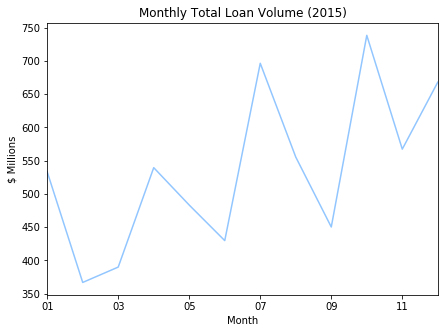

In [9]:
plt.figure(figsize = (7,5))
(monthly_loan_amnts['funded_amnt']/1e6).plot()
plt.title('Monthly Total Loan Volume (2015)')
plt.ylabel('$ Millions')
plt.xlabel('Month')

In [10]:
monthly_avg_loan_amnts = df.groupby(by = 'issue_month')['funded_amnt'].mean()

In [11]:
monthly_avg_loan_amnts

issue_month
01    15185.933717
02    15435.781447
03    15354.459646
04    15225.705676
05    15140.835240
06    15087.841847
07    15148.135416
08    15474.875996
09    15720.358926
10    15180.057988
11    15114.503730
12    15062.367228
Name: funded_amnt, dtype: float64

Text(0.5, 0, 'Month')

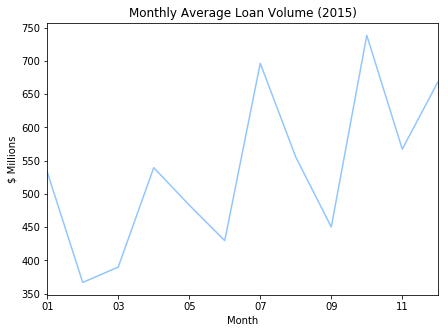

In [12]:
plt.figure(figsize = (7,5))
(monthly_loan_amnts['funded_amnt']/1e6).plot()
plt.title('Monthly Average Loan Volume (2015)')
plt.ylabel('$ Millions')
plt.xlabel('Month')

### What are the default rates by Loan Grade?

- `grade`: LC assigned loan grade

- `loan_status`: Current status of the loan ('Fully Paid',
 'Current',
 'Charged Off',
 'Late (31-120 days)',
 'In Grace Period',
 'Late (16-30 days)',
 'Default')
 
 

In [13]:
df['loan_status'].value_counts() # only 9 accounts are in default

Fully Paid            196814
Current               151713
Charged Off            63845
Late (31-120 days)      4905
In Grace Period         2757
Late (16-30 days)       1052
Default                    9
Name: loan_status, dtype: int64

In [14]:
df['default_flag'] = (df['loan_status'] == 'Default') * 1

In [15]:
default_by_grade = df.groupby(by = 'grade')['default_flag'].agg(['sum', 'mean']) # delinquency =  default

In [16]:
# default frequency and rate by grade
default_by_grade

,sum,mean
grade,,
A,1,0.000014
B,1,0.000009
C,4,0.000033
D,1,0.000016
E,2,0.000057
F,0,0.000000
G,0,0.000000


### Is Lending Club charging an appropriate interest rate for the risk?

- `term`: The number of payments on the loan. Values are in months and can be either 36 or 60

- `installment`: The monthly payment owed by the borrower if the loan originates (includes interest rate)

- `funded_amnt`: The total amount committed to that loan at that point in time

`total_expected_repayment`: `term` $\times$ `installment`

In [17]:
df['term'] = df['term'].map({' 36 months': 36, ' 60 months':60}) # 3 years or 5 years

In [18]:
total_payments = df['installment'] * df['term']
total_payments = total_payments.to_frame('total_payments')

In [19]:
#pd.concat([total_payments, df['funded_amnt']], 1).head()

In [20]:
df['total_expected_repayment'] = total_payments['total_payments'] * (1 - df['default_flag'])

In [21]:
df['total_expected_repayment'].sum()

8309102650.439997

In [22]:
df['funded_amnt'].sum()

6417608175.0

In [23]:
(df['total_expected_repayment'] - df['funded_amnt']).sum()

1891494475.4399993

In [24]:
df.groupby(by = 'grade')[['funded_amnt', 'total_expected_repayment']].sum() / 1e6 # divide by $1 Million

,funded_amnt,total_expected_repayment
grade,,
A,1077.445350,1202.276853
B,1676.097950,2008.793775
C,1777.831825,2301.170212
D,999.154850,1400.730030
E,645.584850,982.640539
F,197.226225,333.546033
G,44.267125,79.945209


The total loan funded amount is `6,417,608,175` which is less than the expected repayment amount `8,309,102,650` so the Loan Lending Club is charging sufficient interest overall. Loans broken down by grade still present a profit regardlesss of risk of default.

## Section B - Modeling

### QA Data Set

Some basic issues with this data set include:

- missing values; some columns seem to be intended to be all blank or mostly blank. 

- missing values; However, other records seem to be missing at random (MAR)

- dates are in a human readable format, but not very "machine friendly". Parsing the dates takes some extra steps. Dates are in a non-standard format like YYYY-MM-DD

- some numerical values like interest rate have non-numeric characters in the values (i.e. 5.1% instead of 5.1). This again is a non-standard practice.

- zip code field is populated with zip codes ending in "xx"; however, this was probably done to anonymize the data

- employment title has duplicate characters resulting from human entered values. For example, "Teacher" and "teacher" are the same value however because not every character is upper (or lower) case, the data set assumes two different values.

- emp_length is a field recording number of years employed, however, this information is stored as categorical data instead of numerical values. The data is also censored after 10+ years.




In [25]:
for c, s in df.items():
    if s.dtype == 'O':
        print(c)
        print(s.value_counts())

addr_state
CA    58067
TX    34699
NY    33844
FL    29298
IL    16864
NJ    15195
PA    14969
OH    14394
GA    14111
NC    12038
VA    12033
MI    11436
MD    10057
AZ     9700
MA     9521
CO     9068
WA     8917
MN     7799
IN     7264
TN     6903
MO     6699
CT     6327
NV     5924
WI     5663
AL     5347
LA     5098
SC     5056
OR     4944
KY     4112
OK     3968
KS     3736
AR     3152
UT     2836
MS     2593
NM     2351
HI     2083
NH     2062
WV     1974
RI     1843
DE     1239
NE     1162
MT     1162
DC     1006
AK      954
WY      900
VT      892
SD      835
ME      521
ND      479
Name: addr_state, dtype: int64
application_type
Individual    420584
Joint App        511
Name: application_type, dtype: int64
desc
                                                                                                                                                                                                                                                                             

Teacher                                   8070
Manager                                   6802
Owner                                     3849
Registered Nurse                          3209
RN                                        3151
Supervisor                                3016
Sales                                     2588
Project Manager                           2364
Driver                                    2273
Office Manager                            2115
owner                                     1993
Director                                  1969
General Manager                           1915
manager                                   1826
teacher                                   1743
President                                 1683
Engineer                                  1622
driver                                    1462
Vice President                            1408
Attorney                                  1323
Operations Manager                        1242
Accountant   

Source Verified    179565
Verified           123016
Not Verified       118514
Name: verification_status, dtype: int64
zip_code
945xx    4466
750xx    4404
112xx    4170
300xx    4006
606xx    3945
331xx    3433
070xx    3364
770xx    3351
900xx    3218
100xx    3218
891xx    3103
330xx    3029
117xx    2898
917xx    2805
104xx    2771
852xx    2513
921xx    2509
926xx    2414
481xx    2332
913xx    2301
925xx    2267
334xx    2246
601xx    2229
600xx    2194
604xx    2165
113xx    2129
853xx    2069
802xx    2046
080xx    2038
773xx    2037
         ... 
509xx       1
742xx       1
340xx       1
269xx       1
854xx       1
694xx       1
942xx       1
862xx       1
568xx       1
343xx       1
969xx       1
203xx       1
649xx       1
849xx       1
507xx       1
502xx       1
709xx       1
702xx       1
205xx       1
821xx       1
510xx       1
503xx       1
819xx       1
520xx       1
892xx       1
837xx       1
817xx       1
522xx       1
929xx       1
399xx       1
Name: zip_code, Len

In [26]:
df.isnull().mean()[df.isnull().mean() < 0.7]

acc_now_delinq                0.000005
acc_open_past_24mths          0.000005
addr_state                    0.000005
annual_inc                    0.000005
application_type              0.000005
avg_cur_bal                   0.000005
bc_open_to_buy                0.009416
bc_util                       0.010043
chargeoff_within_12_mths      0.000005
collections_12_mths_ex_med    0.000005
delinq_2yrs                   0.000005
delinq_amnt                   0.000005
dti                           0.000009
earliest_cr_line              0.000005
emp_length                    0.056564
emp_title                     0.056700
funded_amnt                   0.000005
funded_amnt_inv               0.000005
grade                         0.000005
home_ownership                0.000005
initial_list_status           0.000005
inq_last_6mths                0.000005
installment                   0.000005
int_rate                      0.000005
issue_d                       0.000005
loan_amnt                

In [27]:
#df.isnull().sum()[df.isnull().mean() < 7]

In [28]:
# the following columns seem to be mostly missing if not all missing
df.isnull().mean()[df.isnull().mean() > 0.7]

all_util                               0.949247
annual_inc_joint                       0.998787
desc                                   0.999893
dti_joint                              0.998791
id                                     0.999995
il_util                                0.955789
inq_fi                                 0.949247
inq_last_12m                           0.949247
max_bal_bc                             0.949247
member_id                              1.000000
mths_since_last_major_derog            0.708549
mths_since_last_record                 0.823283
mths_since_rcnt_il                     0.950581
mths_since_recent_bc_dlq               0.742102
open_acc_6m                            0.949247
open_il_12m                            0.949247
open_il_24m                            0.949247
open_act_il                            0.949247
open_rv_12m                            0.949247
open_rv_24m                            0.949247
total_bal_il                           0

In [29]:
#df['emp_length'].value_counts()

In [30]:
#df['emp_title'].value_counts()

### Are there any glaringly erroneous data values?

In [31]:
df['funded_amnt'].describe()

count    421095.000000
mean      15240.285862
std        8571.325901
min        1000.000000
25%        8500.000000
50%       14000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [32]:
def interst2float(int_rate):
    if isinstance(int_rate, str):
        int_rate = float(int_rate.replace('%', ''))
    return int_rate

In [33]:
df['int_rate'] = df['int_rate'].apply(interst2float)

In [34]:
def length_earliest_crline(date_str):
    if isinstance(date_str, str):
        year = date_str.split('-')[1]
        return 2015- int(year)
    else:
        return np.nan

In [35]:
#df['earliest_cr_line'].apply(length_earliest_crline)
df['length_earliest_cr_line'] = df['earliest_cr_line'].apply(length_earliest_crline)

In [36]:
df['loan_status'].value_counts().index

Index(['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default'],
      dtype='object')

### Using any format and any modeling technique that you prefer, please create a model to predict default within the Lending Club dataset. Show any work that you would deem important in evaluating this process.

- There are 196,814 records with a `loan_status` = `Fully Paid`

- There are 9 records with a `loan_status` = `Default`

- All other `loan_status` will be ignored. Current and delinquent loans may possibly become default, therefore a good benchmark would be to pair `Fully Paid` vs `Default`.

- The data set imbalance is still severe even whislt dropping data points; this will hinder model performance


In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.utils.multiclass import unique_labels
import patsy
from tqdm import tqdm
from tools import plot_confusion_matrix

In [38]:
def fully_paid_or_default(status):
    return status in ['Default', 'Fully Paid']

In [39]:
ind = df['loan_status'].apply(fully_paid_or_default)

In [40]:
df = df.loc[ind].reset_index(drop=True)

In [41]:
df.shape

(196823, 109)

In [42]:
with open("new_features.csv") as myfile:
    cols = list()
    for line in myfile:
        cols.append(line.strip())

In [43]:
cols.remove('column')

In [44]:
#cols
for c in cols:
    print(c, ":", df[c].dtype)

annual_inc : float64
bc_util : float64
dti : float64
grade : object
home_ownership : object
initial_list_status : object
installment : float64
int_rate : float64
loan_amnt : float64
num_tl_op_past_12m : float64
open_acc : float64
pct_tl_nvr_dlq : float64
percent_bc_gt_75 : float64
title : object
total_acc : float64
total_bc_limit : float64
verification_status : object


In [45]:
for c in cols:
    if df[c].dtype == 'O':
        print(c, df[c].value_counts().shape[0])

grade 7
home_ownership 3
initial_list_status 2
title 20
verification_status 3


In [46]:
model_str = "default_flag ~ " + " + ".join(cols)

In [47]:
model_str

'default_flag ~ annual_inc + bc_util + dti + grade + home_ownership + initial_list_status + installment + int_rate + loan_amnt + num_tl_op_past_12m + open_acc + pct_tl_nvr_dlq + percent_bc_gt_75 + title + total_acc + total_bc_limit + verification_status'

In [48]:
df['default_flag'].sum()

9

In [49]:
#ind = df[cols].isnull().sum(axis=1) < 1 # choose columns with no missing data

In [50]:
df['loan_status'].value_counts()

Fully Paid    196814
Default            9
Name: loan_status, dtype: int64

In [51]:
Y, X = patsy.dmatrices(formula_like=model_str, data = df, return_type='dataframe')

In [52]:
Y.shape

(194554, 1)

In [53]:
X.shape

(194554, 43)

In [54]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y)

In [ ]:
train_x.shape

In [ ]:
train_y.sum()

In [ ]:
test_y.sum()

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=1000)

In [ ]:
ada_model.fit(train_x, train_y['default_flag'])

In [ ]:
ada_preds = ada_model.predict(test_x)

In [ ]:
plot_confusion_matrix(test_y.astype(int), ada_preds.astype(int), classes=np.array([0,1]))

In [ ]:
y_score = ada_model.predict_proba(test_x)

In [ ]:
fpr, tpr, thres = roc_curve(test_y['default_flag'], y_score[:, 1])

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize = (7, 5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#0.62

In [55]:
def sample_data(val):
    if val > 0:
        return True
    else:
        return np.random.rand() < 0.05

In [56]:
ind = train_y['default_flag'].apply(sample_data)

In [57]:
train_x, train_y = train_x.loc[ind], train_y.loc[ind]

In [58]:
#ind.shape

In [59]:
#train_x.shape

In [92]:
ada_model = AdaBoostClassifier(n_estimators=600)

In [93]:
ada_model.fit(train_x, train_y)

/home/jonathan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=600, random_state=None)

In [94]:
ada_preds = ada_model.predict(test_x)

Confusion matrix, without normalization
[[48632     5]
 [    2     0]]


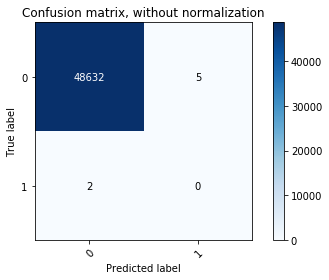

In [95]:
plot_confusion_matrix(test_y.astype(int), ada_preds.astype(int), classes=np.array([0,1]))

In [96]:
y_score = ada_model.predict_proba(test_x)

In [97]:
fpr, tpr, thres = roc_curve(test_y['default_flag'], y_score[:, 1])

In [98]:
roc_auc = auc(fpr, tpr)

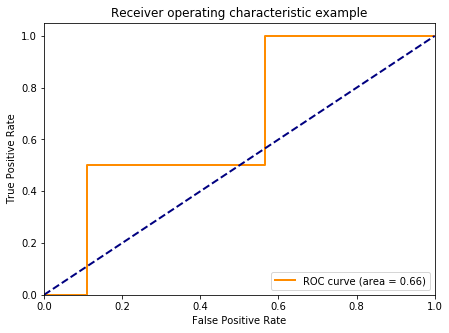

In [99]:
plt.figure(figsize = (7, 5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pos_ind = train_y['default_flag'].astype(int) == 1

In [ ]:
pos_train_x = train_x[pos_ind]
pos_train_y = train_y[pos_ind]

In [ ]:
neg_train_x = train_x[~pos_ind]
neg_train_y = train_y[~pos_ind]

In [ ]:
neg_x_sets = np.array_split(neg_train_x, 1400)
neg_y_sets = np.array_split(neg_train_y, 1400)

In [ ]:
models = []

In [ ]:
neg_x_sets[0].shape

In [ ]:
layer_sizes = (64, 64)

In [ ]:
for i in tqdm(range(len(neg_x_sets))):
    training_x_data = pd.concat([pos_train_x, neg_x_sets[i]])
    training_y_data = pd.concat([pos_train_y, neg_y_sets[i]])
    #print("X", training_x_data.index)
    #print("Y", training_y_data.index)
    training_x_data = training_x_data.sample(frac=1)
    ind = training_x_data.index
    #print("new X", ind)
    training_y_data = training_y_data.loc[ind]
    #print("new Y", training_y_data.index)
    _tmp_model = MLPClassifier(hidden_layer_sizes=layer_sizes)
    _tmp_model.fit(training_x_data, training_y_data.values.ravel())
    models.append(_tmp_model)
    #break

In [ ]:

n = train_x.shape[0]
results = np.zeros((n, 1))
for _tmp_model in tqdm(models):
    out = _tmp_model.predict_proba(train_x) ## use train data
    results += out[:, 1].reshape(n,1)
    #break

In [ ]:
#y_score = np.hstack(results).mean(axis=1)
results.shape
y_score = results.ravel()

In [ ]:
fpr, tpr, thres = roc_curve(train_y['default_flag'], y_score)

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#np.hstack(results).mean(axis=1)

In [ ]:
#array([0.01318453, 0.01143215, 0.02020618, 0.0125    , 0.01078626,
#       0.02300306, 0.0112357 ])

In [ ]:

n = test_x.shape[0]
test_results = np.zeros((n, 1))
for _tmp_model in tqdm(models):
    out = _tmp_model.predict_proba(test_x) ## use test data
    test_results += out[:, 1].reshape(n,1)
    #break

In [ ]:
test_results = []
for _tmp_model in tqdm(models):
    out = _tmp_model.predict_proba(test_x) ## use test data
    test_results.append(out[:, 1].reshape(n,1))
    #break

In [ ]:
y_score = np.hstack(test_results).max(axis=1)

In [ ]:
#y_score = test_results.ravel() / n

In [ ]:
fpr, tpr, thres = roc_curve(test_y['default_flag'], y_score)

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(7, 5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
preds = y_score > 0.5

In [ ]:
plot_confusion_matrix(test_y.astype(int), preds.astype(int), classes=np.array([0,1]))